## Описовий аналіз (Descriptive Analysis)

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df = pd.read_csv('data/health_data.csv', sep=';', index_col=0)
df['age'] = (df['age'] / 365).round(0) # перетворюємо дні у роки
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,53.338686,6.765294,30.0,48.0,54.0,58.0,65.0
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0


З таблиці можна побачити наявність "неадекватних" даних, які треба відфільтрувати:
- мінімальне значення систолічного кров'яного тиску (ap_hi): -150
- мінімальне значення діастолічного артеріального тиску (ap_lo): -70
- максимальне значення систолічного кров'яного тиску (ap_hi): 16020
- максимальне значення діастолічного артеріального тиску (ap_lo): 11000

, такі значення вважаються фізично неможливими для людини.

Оскільки мінімальний вік людини 30 років, то "неадекватними" значеннями можна вважати мінімальну вагу людини (10) та мінімальний зріст (55)

In [36]:
# чистимо датасет від "неадекватних" даних
df = df[(df['ap_hi'] >= 60) & (df['ap_hi'] <= 250)]
df = df[(df['ap_lo'] >= 40) & (df['ap_lo'] <= 150)]
df = df[df['height'] >= 100]
df = df[df['weight'] >= 30]

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,68723.0,53.326747,6.767353,30.0,48.0,54.0,58.0,65.0
gender,68723.0,1.348748,0.476577,1.0,1.0,1.0,2.0,2.0
height,68723.0,164.396636,7.985390,100.0,159.0,165.0,170.0,250.0
weight,68723.0,74.122665,14.307118,30.0,65.0,72.0,82.0,200.0
ap_hi,68723.0,126.614962,16.747085,60.0,120.0,120.0,140.0,240.0
ap_lo,68723.0,81.356620,9.556199,40.0,80.0,80.0,90.0,150.0
cholesterol,68723.0,1.364754,0.679001,1.0,1.0,1.0,2.0,3.0
gluc,68723.0,1.225936,0.571900,1.0,1.0,1.0,1.0,3.0
smoke,68723.0,0.088020,0.283326,0.0,0.0,0.0,0.0,1.0
alco,68723.0,0.053563,0.225155,0.0,0.0,0.0,0.0,1.0


In [37]:
action = [pd.Series.mean,
        pd.Series.var,
        pd.Series.std,
        pd.Series.skew]
agg_dict = {}
variables = ['ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'alco', 'smoke', 'active', 'cardio']

for col in variables: # для кожного значення зі списку обчислюємо action та фіксуємо список очислених значень у словнику 
    agg_dict[col] = action

grouped_df = df.groupby(['gender']).agg(agg_dict) 

for col in variables:
    print(f'{col}')
    display(grouped_df[col].style.background_gradient(axis=0)) # візуалізуємо значення, виділяючи значення кольорами 

ap_hi


,mean,var,std,skew
gender,,,,
1,125.865046,281.425693,16.775747,0.827871
2,128.015354,275.670882,16.603339,1.072124


ap_lo


,mean,var,std,skew
gender,,,,
1,80.881468,91.957953,9.589471,0.346421
2,82.243919,88.926231,9.430071,0.640165


cholesterol


,mean,var,std,skew
gender,,,,
1,1.382943,0.479404,0.692390,1.522487
2,1.330788,0.424998,0.651919,1.746011


gluc


,mean,var,std,skew
gender,,,,
1,1.234717,0.339566,0.582723,2.337444
2,1.209538,0.303334,0.550758,2.530697


alco


,mean,var,std,skew
gender,,,,
1,0.025337,0.024696,0.157149,6.041177
2,0.106271,0.094982,0.308191,2.555312


smoke


,mean,var,std,skew
gender,,,,
1,0.017763,0.017448,0.132090,7.301953
2,0.219218,0.171169,0.413725,1.357448


active


,mean,var,std,skew
gender,,,,
1,0.801636,0.159020,0.398773,-1.512888
2,0.806609,0.155997,0.394965,-1.552718


cardio


,mean,var,std,skew
gender,,,,
1,0.492157,0.249944,0.499944,0.031375
2,0.499812,0.250010,0.500010,0.000751


У таблицях вище можна побачити порівняння показників mean, var, std та skew за статтю, а саме:
- систолічний тиск (ap_hi):
    - середнє значення (mean) статті (gender) 1 нижче (125,8), ніж у статті 2 (128,0)
    - асиметрія (skew) - позитивна, що означає наявність людей із високим систолічним тиском
- діастолічний тиск (ap_lo):
    - mean для gender 1 нижчий (80,8), ніж для gender 2 (82,2)
    - дисперсія (var) та стандартне відхилення (std) у gender 1 трохи більше, ніж у gender 2. Також наявна позитивна симетрія
- Холестерин (cholesterol):
    - наявна позитивна асиметрія - наявні люди з підвищенним рівнем холестерину
- Глюкоза (gluc):
    - позитивна асиметрія вказує на частку людей з високим рівнем глюкози, що може свідчити про наявність людей з діабетом
- Алкоголь (alco):
    - показники mean, var та std для gender 2 вищі, ніж для gender 1
    - для gender 1 значно виражена позитивна асиметрія, що свідчить про велику частку людей, які не вживають алкоголь. Проте і для gender 2 можна сказати те ж саме, хоча позитивна асиметрія не настільки виражена
- Куріння (smoke):
    - показники mean, var та std для gender 2 вищі, ніж для gender 1
    - обидва gender мають позитивну асиметрію, проте значення skew для gender 1 (7,3) свідчить про набагато більшу частку людей, які не курять, ніж для gender 2.
- Фізична активність (active):
    - усі значення для обох gender мають схожі значення
    - асиметрія - негативна, що свідчить про більшу кількість людей, які ведуть активний спосіб життя
- Серцево-судинні захворювання (cardio):
    - асиметрія для обох gender близиться до нормальної, що може свідчити про рівномірний розподіл між хворими та здоровими людьми

In [38]:
# Описовий аналіз "Стать - Паління / Вживання алкоголю"
gend_variables = ['smoke', 'alco']

for col in gend_variables:
    display(df.groupby('gender')[col].\
    value_counts().\
    to_frame().\
    unstack())

count      
smoke       0     1
gender             
1       43961   795
2       18713  5254

count      
alco        0     1
gender             
1       43622  1134
2       21420  2547

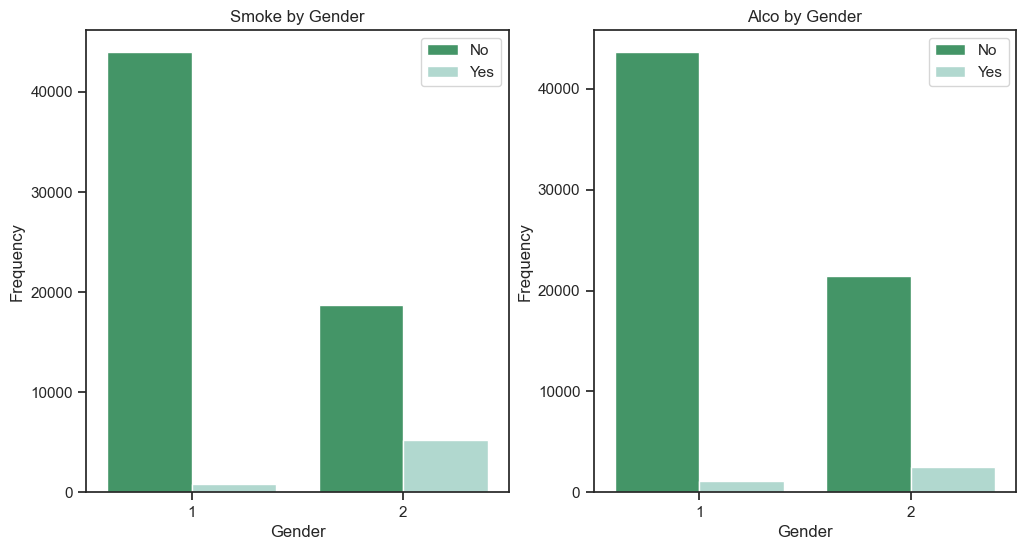

In [39]:
def show_gender_plot(df, col, i):
    sns.countplot(data=df, x='gender', hue=col, ax=axes[i], palette='BuGn_r')
    axes[i].set_title(f'{col.capitalize()} by Gender')
    axes[i].set_xlabel('Gender')
    axes[i].set_ylabel('Frequency')
    axes[i].legend(labels=['No', 'Yes'])

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, col in enumerate(gend_variables):
    show_gender_plot(df, col, i)

plt.show()

З гістограм можна більш чітко побачити, що серед обох статтей більша кількість людей, які не курять та не вживають алкоголь. Проте, якщо порівняти значення для кожного gender, то gender 2 нараховує значно більшу кількість курців і трохи більшу кількість людей, які вживають алкоголь, ніж gender 1.

In [40]:
# Описовий аналіз "Вік - Холестерин / Глюкоза"
def quantiles_by_age(df, grouper, variable, percentiles = [.25, .50, .75]):
    display(
        df.groupby(grouper)[variable].describe(percentiles = percentiles).T\
        .style.format('{:,.2f}').background_gradient(axis = 1)
    )

age_hg_var = ['cholesterol', 'gluc']

for col in age_hg_var:
    quantiles_by_age(df, col, 'age')

cholesterol,1,2,3
count,"51,536.00","9,307.00","7,880.00"
mean,52.82,53.70,56.22
std,6.81,6.60,5.84
min,30.00,39.00,39.00
25%,48.00,50.00,52.00
50%,54.00,54.00,57.00
75%,58.00,59.00,60.00
max,65.00,65.00,65.00


gluc,1,2,3
count,"58,425.00","5,069.00","5,229.00"
mean,53.08,53.92,55.56
std,6.79,6.74,6.03
min,30.00,39.00,39.00
25%,48.00,50.00,52.00
50%,54.00,54.00,56.00
75%,58.00,60.00,60.00
max,65.00,65.00,65.00


З табличок можна побачити, що більшість людей для обох значень (холестерин, глюкоза) обрали значення "нормального рівня", при цьому цей рівень має найбільше значення стандартного відхилення, що може свідчити про наявність викидів. Також прослідковується тенденція підвищення значень обох показників з віком.

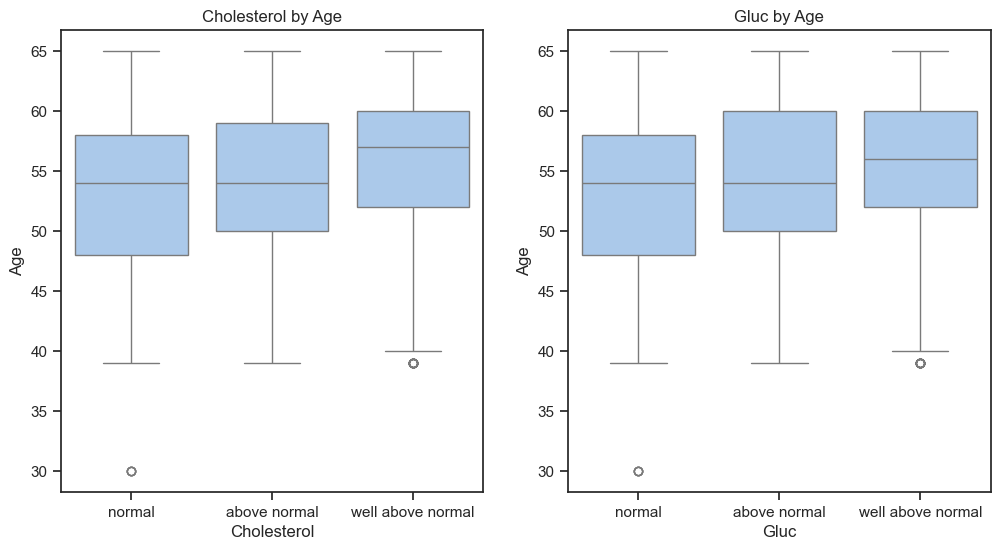

In [41]:
def show_age_hg_plot(df, col, i):
    str_col = str(col)
    sns.boxplot(data=df, x=col, y='age', ax=axes[i])
    axes[i].set_title(f'{str_col.capitalize()} by Age')
    axes[i].set_xlabel(str_col.capitalize())
    axes[i].set_ylabel('Age')
    axes[i].set_xticks([0, 1, 2], ['normal', 'above normal', 'well above normal'])

fig, axes = plt.subplots(1, 2 , figsize=(12, 6))

for i, col in enumerate(age_hg_var):
    show_age_hg_plot(df, col, i)

plt.show()


Хоча з табличних значень помітно не було, але ми маємо викиди не тільки для 1 рівня, а ще й для 3 в обох показниках

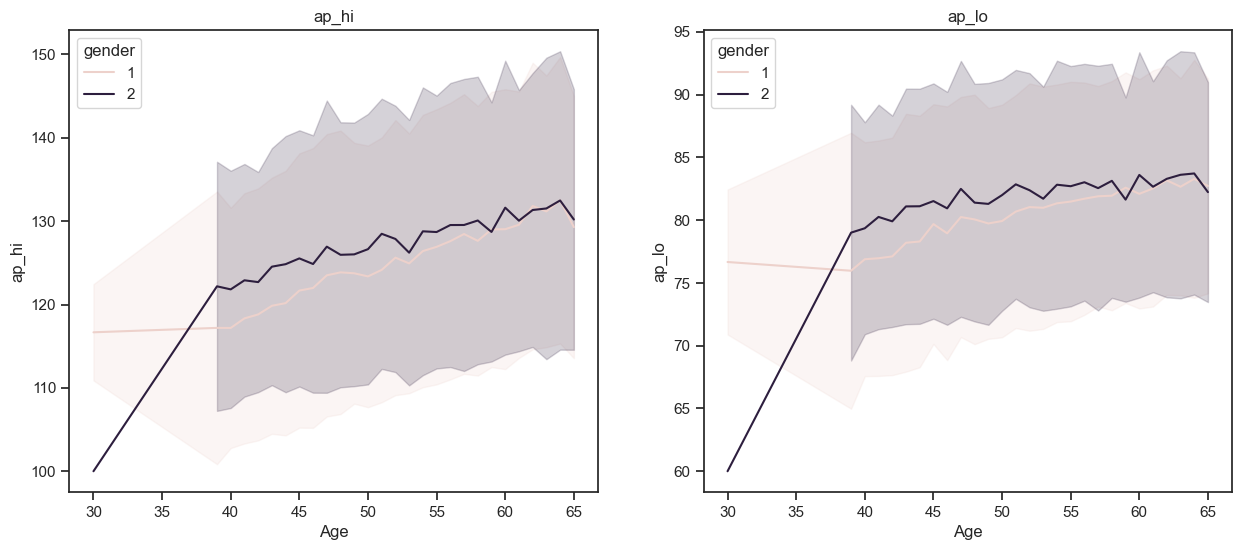

In [42]:
# Описовий аналіз "Вік - Стать - Систолічний / Дистолічний тиск"
age_gend_ap_variables = ['ap_hi', 'ap_lo']

def show_age_gend_ap_plot(df, col, i):
    sns.lineplot(data=df, x='age', y=col, hue='gender', errorbar='sd', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel(col)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, col in enumerate(age_gend_ap_variables):
    show_age_gend_ap_plot(df, col, i)

plt.show()

- З діаграми ap_hi можна побачити, що стать 1 загалом має менші середні показники систолічного тиску, при цьому має тенденцію швидкого підвищення з роками. Стать 2 має більше стабільні значення систолічного тиску. Також можна виділити, що люди літнього віку, незалежно від статті, мають схожі значення.
- З діаграми ap_lo можна побачити схожі тенденції з ap_hi, проте для обох статтей значення дистолічного тиску майже не зазнають вагомих змін. 

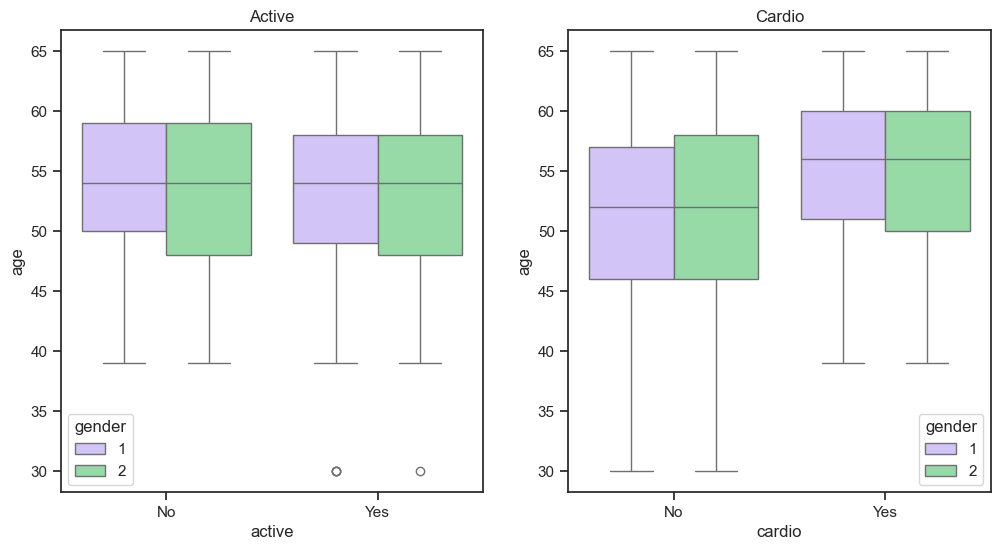

In [43]:
# Описовий аналіз "Вік = Стать - Фізична активність / Серцево-судинні захворювання"
sns.set_theme(style="ticks", palette="pastel")

def show_age_gend_ac_plot(df, col, i):
    sns.boxplot(data=df, x=col, y='age', hue='gender', palette=["m", "g"], ax=axes[i])
    axes[i].set_title(f'{col.capitalize()}')
    axes[i].set_xticks([0, 1], ['No', 'Yes'])

age_gend_ac_var = ['active', 'cardio']
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, col in enumerate(age_gend_ac_var):
    show_age_gend_ac_plot(df, col, i)

plt.show()

- З діаграми фізичної активності (active) можна побачити, що при схожому розподілі віку зустрічаються як активні люди, так і неактивні. Також серед активних помітно викиди, що може свідчити про наявність молодших людей (30 років), оскільки основна група людей - це люди середнього та старшого віку (40-65 р.)
- З діаграми серцево-судинних захворювань (cardio) можна побачити, що найчастіше наявність захворювань зустрічаються серед людей 55 років.

Серед обох діаграм помітно, що стать не має впливу, і стать 1, і стать 2 мають схожі результати.

## Кореляційний аналіз (Correlation Analysis)

continious: age, height, weight, ap_hi, ap_lo - Пірсон

binary: smoke, alco, active, cardio

categorical: gender, cholesterol, glucose - Спірмен, Chi-square

In [44]:
from scipy.stats import spearmanr, chi2_contingency

In [45]:
# об'єднуємо значення за категоріями
continious = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
binary = ['smoke', 'alco', 'active', 'cardio']
categorical = ['gender', 'cholesterol', 'gluc']

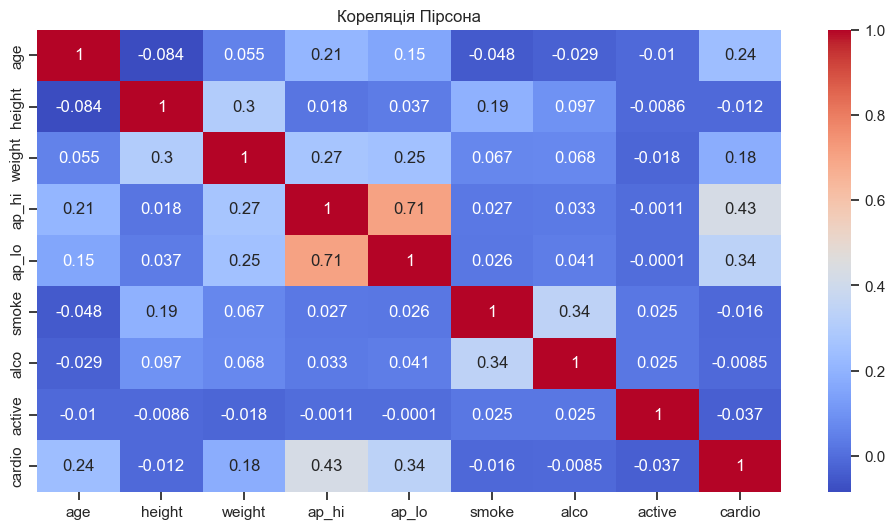

In [46]:
# Кореляція Пірсона
cont_binary = continious + binary # об'єднуємо списки для більшої зручності 

# візуалізуємо результати кореляції значень зі списку для швидшого розуміння 
plt.figure(figsize=(12, 6))
sns.heatmap(df[cont_binary].corr(), annot=True, cmap='coolwarm')
plt.title('Кореляція Пірсона')
plt.show()

З кореляції Пірсона для чисельних даних можна побачити, що:
- серед змінних вік (age), зріст (height), вага (weight) та фізична активність (active) до інших змінних прослідковується слабка кореляція або майже її відсутність. Хоча можна помітити слабку, але доволі значущу кореляції між віком та серцево-судинними захворюваннями, що надає розуміння про ризик такого захворювання з віком. Про таку ж кореляцію можна зазначити і між вагою та систолічним і дистолічним тиском, що надає розуміння про ризик підвищення тиску через надмірну вагу.
- систолічний (ap_hi) та дистолічний (ap_lo) тиск мають сильну кореляцію між собою та середню до серцево-судинних захворювань (cardio)
- серед значень курців (smoke) та людей, які вживають алкоголь (alco), також наявна середня кореляція 

P-значення:


,cholesterol,gluc,smoke,alco,active,cardio
cholesterol,0.000000e+00,0.000000e+00,9.231050e-05,9.676015e-27,9.173678e-02,0.000000e+00
gluc,0.000000e+00,0.000000e+00,9.173557e-01,2.827489e-06,1.115772e-02,3.040821e-129
smoke,9.231050e-05,9.173557e-01,0.000000e+00,0.000000e+00,2.841694e-11,2.038818e-05
alco,9.676015e-27,2.827489e-06,0.000000e+00,0.000000e+00,7.311241e-11,2.654502e-02
active,9.173678e-02,1.115772e-02,2.841694e-11,7.311241e-11,0.000000e+00,1.113441e-22
cardio,0.000000e+00,3.040821e-129,2.038818e-05,2.654502e-02,1.113441e-22,0.000000e+00


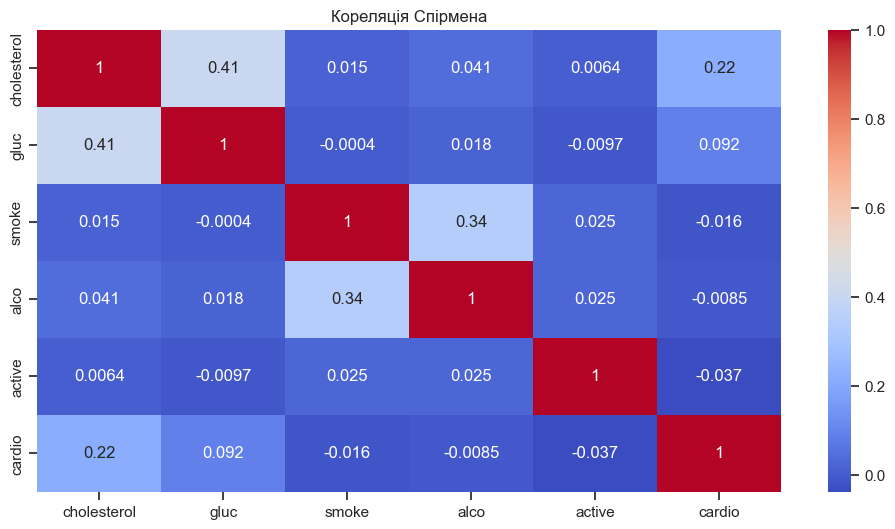

In [47]:
categ_binar = categorical + binary # об'єднуємо категоріальні та бінарні значення
categ_binar.remove('gender') # видаляємо стать, оскільки більш доречно використати її у прорахуванні chi-square

# Кореляція Спірмена
spearman_corr = np.zeros((len(categ_binar), len(categ_binar))) # створюємо матриці для фіксації значення кореляції 
p_val = np.zeros((len(categ_binar), len(categ_binar))) # та р-значення

for i, cb1 in enumerate(categ_binar):
    for j, cb2 in enumerate(categ_binar):
        corr, pval = spearmanr(df[cb1], df[cb2]) # знаходимо значення кореляції та p-значення
        spearman_corr[i, j] = corr # записуємо значення у матрицю
        p_val[i, j] = pval 

# Створюємо дата-фрейми з матриць spearman_corr та p_val
spearman_corr_df = pd.DataFrame(spearman_corr, index=categ_binar, columns=categ_binar)
p_val_df = pd.DataFrame(p_val, index=categ_binar, columns=categ_binar)

print('P-значення:')
display(p_val_df)

plt.figure(figsize=(12, 6))
sns.heatmap(spearman_corr_df, annot=True, cmap='coolwarm')
plt.title('Кореляція Спірмена')
plt.show()

З кореляції Спірмана можна побачити:
- середню позитивну кореляцію між рівнем глюкози та холестерином, що може вказувати на те, що люди з високим рівнем холестерину мають, як правило, і високий рівень глюкози
- як і в кореляції Пірсона, можна побачити середню позитивну кореляцію між курцями та людьми, що вживають алкоголь
- споміж слабких кореляцій помітна слабка залежність між рівнем холестерину та серцево-судинними захворюваннями, що може вказувати на те, що збільше рівня холестерину може призвести до збільшення ризику кардіозахворювання

In [48]:
# Chi-square 
for var_ in categ_binar: 
    display(pd.crosstab(df['gender'], df[var_]))

cholesterol,1,2,3
gender,,,
1,33057,6259,5440
2,18479,3048,2440


gluc,1,2,3
gender,,,
1,37830,3347,3579
2,20595,1722,1650


smoke,0,1
gender,,
1,43961,795
2,18713,5254


alco,0,1
gender,,
1,43622,1134
2,21420,2547


active,0,1
gender,,
1,8878,35878
2,4635,19332


cardio,0,1
gender,,
1,22729,22027
2,11988,11979


In [49]:
dof_1 = 3.84 # табличне значення Degree of Freedom = 1 та alpha = 0.05
dof_2 = 5.99 # табличне значення Degree of Freedom = 2 та alpha = 0.05

'''
    перевірка гіпотези H0 - стать впливає на рівень холестерину та глюкози, куріння, вживання алкоголю, активний спосіб життя та наявність серцево-судинних захворювань
'''

for var_ in categ_binar: 
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['gender'], df[var_])) 
    print(
        f'Gender - {var_.capitalize()}\n',
        'Chi-Sq Stat.:', chi2,
        'P-value:', p,
        'Degree of Freedom:', dof,
    )

    if ((dof == 1) & (chi2 > dof_1)) | ((dof == 2) & (chi2 > dof_2)): # перевірка умов для прийняття чи відхидення гіпотези
        print('Reject H0\n')
    else:
        print('Accept H0\n')

Gender - Cholesterol
 Chi-Sq Stat.: 93.42687000099757 P-value: 5.159563342551543e-21 Degree of Freedom: 2
Reject H0

Gender - Gluc
 Chi-Sq Stat.: 30.82655809186558 P-value: 2.0234755556438973e-07 Degree of Freedom: 2
Reject H0

Gender - Smoke
 Chi-Sq Stat.: 7888.864603518239 P-value: 0.0 Degree of Freedom: 1
Reject H0

Gender - Alco
 Chi-Sq Stat.: 2015.2210275314815 P-value: 0.0 Degree of Freedom: 1
Reject H0

Gender - Active
 Chi-Sq Stat.: 2.4127840131717453 P-value: 0.12034816561579605 Degree of Freedom: 1
Accept H0

Gender - Cardio
 Chi-Sq Stat.: 3.6281949712143864 P-value: 0.05680839744171188 Degree of Freedom: 1
Accept H0



З результатів можна побачити:
- фізична активність та серцево-судинні захворювання не мають залежності від статті, тому гіпотеза H0 підтверджується
- гендер впливає на рівень холестеролу, глюкози, вживання алкоголю та куріння, таким чином гіпотеза H0 відхиляється